<a href="https://colab.research.google.com/github/ektaatomar/Regression-model-with-non-linear-data/blob/master/Cement_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install xlrd #required to read excel file 

import matplotlib.pyplot as plt


In [0]:
import pandas as pd
df = pd.ExcelFile("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls")
print(df.sheet_names)
df1 = df.parse('Sheet1') # parse only the required sheet in dataframe
df1.describe()


['Sheet1', 'Sheet2', 'Sheet3']


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [0]:
print(df1.columns[-2]) #to check the exact label name
df1.rename(columns={'Concrete compressive strength(MPa, megapascals) ': 'strength'}, inplace=True)


Age (day)


Age (day)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88ed224160>,
      dtype=object)

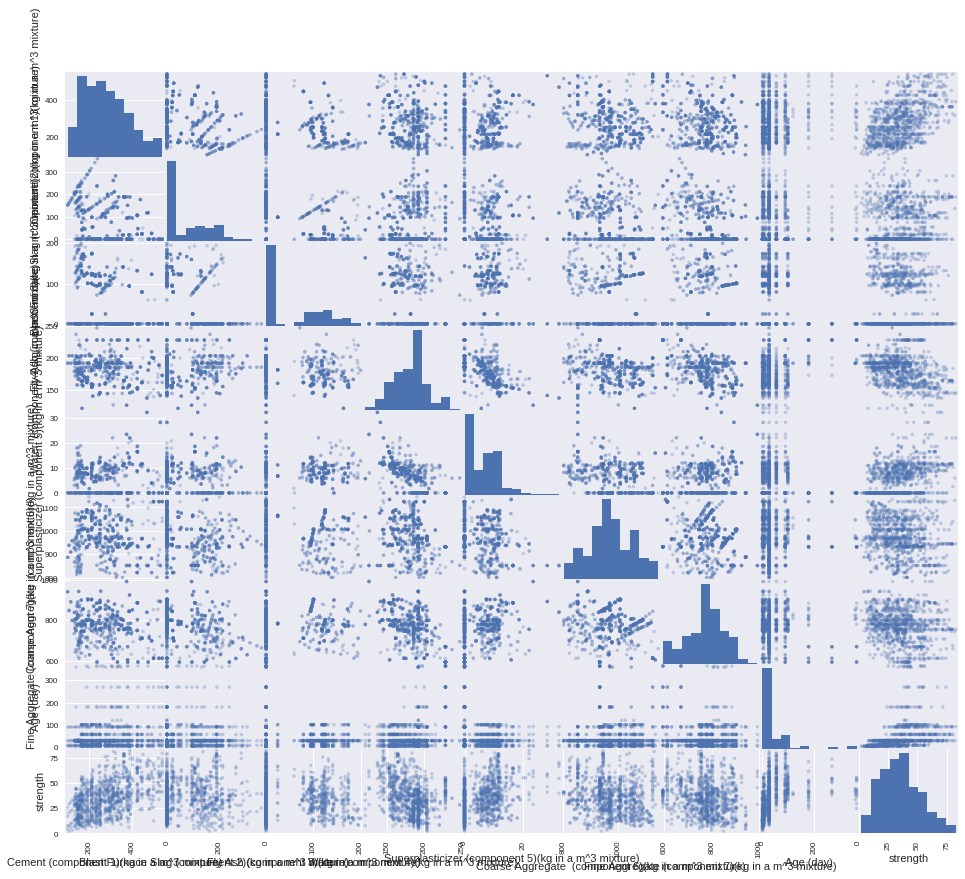

In [0]:

#df1_copy=df1.sort_values(by=['Concrete compressive strength(MPa, megapascals) '])
%matplotlib inline
df1.corr()['strength'].sort_values(ascending= False)

from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=0.3, figsize=(16, 14))
#plt.show()
#82.599225
#2.331808



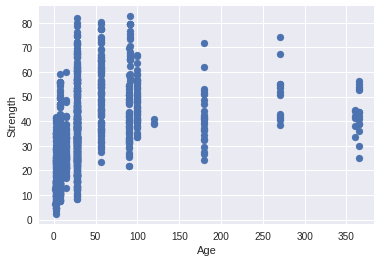

In [0]:
plt.scatter(df1['Age (day)'],df1['strength'])
plt.xlabel('Age')
plt.ylabel('Strength')
plt.show()

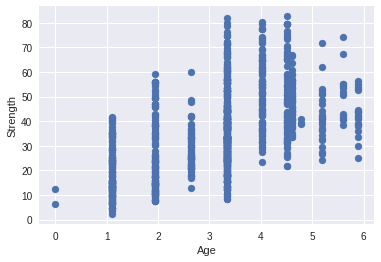

In [0]:
# transforming data to make it easy to predict using linear regression 
import math
age = []
for a in df1['Age (day)']:
    age.append(math.log(a))
plt.scatter(age,df1['strength'])
plt.xlabel('Age')
plt.ylabel('Strength')
plt.show()

In [0]:
!pip install sklearn-pandas

Tried to standardise data but it doesnot help in improving accuracy. 

In [0]:
#from sklearn_pandas import DataFrameMapper
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#df1=ss.fit_transform(df1)
#df1.shape
#mapper = DataFrameMapper([(df1.columns, StandardScaler())])
#scaled_features = mapper.fit_transform(df1.copy(), 4)
#scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
#scaled_features_df.head()

In [0]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import  r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(df1[df1.columns[:-1]] ,df1.strength, test_size = 0.40 , random_state = 42)

x_train.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,284.285971,76.317654,50.892654,182.699159,5.889856,973.879272,769.710841,46.563107
std,107.331251,88.835328,63.439244,20.569115,5.861498,77.124498,79.894932,62.172527
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,167.575000,0.000000,932.000000,721.000000,14.000000
50%,277.050000,22.000000,0.000000,185.700000,6.000000,968.000000,777.800000,28.000000
75%,362.600000,150.650000,115.900000,192.000000,10.000000,1036.250000,821.000000,56.000000
max,540.000000,359.400000,195.000000,246.900000,32.200000,1145.000000,992.600000,365.000000


In [0]:
#before transforming age low accuracy in linear regression 
linear_reg = LinearRegression().fit(x_train, y_train)

print("Linear Reg Training: {:.2f}".format(linear_reg.score(x_train, y_train)))
print("Linear Reg Test    : {:.2f}".format(linear_reg.score(x_test, y_test)))
print("Linear Reg R sqaure: ", r2_score(y_test, pred_lr))
print("Linear Reg RMSE    : ", sqrt(mean_squared_error(y_test, pred_lr)))
print('\n')



Linear Reg Training: 0.62
Linear Reg Test    : 0.60
Linear Reg R sqaure:  0.8122130965653058
Linear Reg RMSE    :  7.4579073508765985




In [0]:

#transforming  age and replacing in dataframe
df1['Age (day)']=  age
#df1.head()

#from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df1[df1.columns[:-1]] ,df1.strength, test_size = 0.40 , random_state = 42)

In [0]:
tree = DecisionTreeRegressor(max_depth= 10).fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)
ridge = Ridge(alpha = 10).fit(x_train, y_train)
lasso = Lasso(alpha = 0.01, max_iter=1000000).fit(x_train, y_train)


#df1.strength = pd.to_numeric(df1.strength, errors='coerce')
#df1['Age (day)'] = np.log(df1['Age (day)'] )

pred_tree = tree.predict(x_test)
pred_lr = linear_reg.predict(x_test)
pred_ridge = ridge.predict(x_test)
pred_lasso = lasso.predict(x_test)

print("Tree Training : {:.2f}".format(tree.score(x_train, y_train)))
print("Tree Test     : {:.2f}".format(tree.score(x_test, y_test)))
print("Tree: R sqaure: ", r2_score(y_test, pred_tree))
print("Tree: RMSE    : ", sqrt(mean_squared_error(y_test, pred_tree)))
print('\n')

print("Linear Reg Training: {:.2f}".format(linear_reg.score(x_train, y_train)))
print("Linear Reg Test    : {:.2f}".format(linear_reg.score(x_test, y_test)))
print("Linear Reg R sqaure: ", r2_score(y_test, pred_lr))
print("Linear Reg RMSE    : ", sqrt(mean_squared_error(y_test, pred_lr)))
print('\n')


print("Ridge Training: {:.2f}".format(ridge.score(x_train, y_train)))
print("Ridge Test    : {:.2f}".format(ridge.score(x_test, y_test)))
print("Ridge R sqaure: ", r2_score(y_test, pred_ridge))
print("Ridge RMSE    : ", sqrt(mean_squared_error(y_test, pred_ridge)))
print('\n')


print("Lasso Training : {:.2f}".format(lasso.score(x_train, y_train)))
print("Lasso Test     : {:.2f}".format(lasso.score(x_test, y_test)))
print("Lasso R sqaure: ", r2_score(y_test, pred_lasso))
print("Lasso RMSE    : ", sqrt(mean_squared_error(y_test, pred_lasso)))




Tree Training : 0.99
Tree Test     : 0.80
Tree: R sqaure:  0.7982528472559777
Tree: RMSE    :  7.730152125101435


Linear Reg Training: 0.82
Linear Reg Test    : 0.81
Linear Reg R sqaure:  0.8122130965653058
Linear Reg RMSE    :  7.4579073508765985


Ridge Training: 0.82
Ridge Test    : 0.81
Ridge R sqaure:  0.811793638060199
Ridge RMSE    :  7.466232046723547


Lasso Training : 0.82
Lasso Test     : 0.81
Lasso R sqaure:  0.8122061144495468
Lasso RMSE    :  7.458045996030965


In [0]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

g_reg=clf.fit(x_train, y_train)
pred_g_reg = g_reg.predict(x_test)

rmse =sqrt( mean_squared_error(y_test, g_reg.predict(x_test)))
print("Tree Training : {:.2f}".format(g_reg.score(x_train, y_train)))
print("Tree Test     : {:.2f}".format(g_reg.score(x_test, y_test)))
print("Tree: R sqaure: ", r2_score(y_test, pred_g_reg))
print("Tree: RMSE    : ", sqrt(mean_squared_error(y_test, pred_g_reg)))

Tree Training : 0.95
Tree Test     : 0.88
Tree: R sqaure:  0.8781716707812887
Tree: RMSE    :  6.007011697790224


GradientBoostingRegressor gives highest R square values even the error is the lowest of all the other regressors. '
Could have tried k mean regressor also- it may require to bin the traget into ranges.